In [1]:
import numpy as np
import sys
rng = np.random.default_rng(12345)
data = np.arange(15)
probabilities = np.array(
               [0.3, 0.2, 0.1, 0.05, 0.05, 0.05, 0.05, 0.025,
               0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025]
           )
assert round(sum(probabilities), 10) == 1.0, \
               "Probabilities must sum to 1"

In [10]:
selected = rng.choice(data, p=probabilities, replace=True)  #  第一个是要选的数，第二个是概率 这是选一个数
#  We turned replacement on so that the same element can be selected more than once.
selected = rng.choice(data, p=probabilities, replace=True,size=(5, 5))  #  这是选一个5*5的数组

In [11]:
random_floats = rng.random(size=(5, 5))  #  0~1的浮点数
random_ints = rng.integers(1, 20, endpoint=True, size=10)  #  1~20的整数

In [ ]:
import matplotlib.pyplot as plt
dist = rng.random(size=1000)
fig, ax = plt.subplots()
ax.hist(dist)
ax.set_title("Histogram of random numbers")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

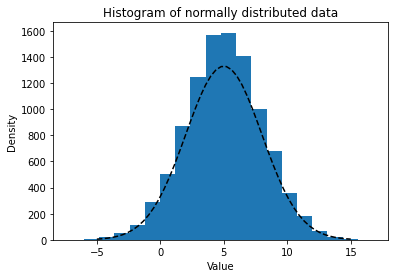

In [57]:
#  随机产生的正态分布 (1)
mu = 5.0 # mean value
sigma = 3.0 # standard deviation
rands = rng.normal(loc=mu, scale=sigma, size=10000)  #  rng = np.random.default_rng(12345)

fig, ax = plt.subplots()
ax.hist(rands, bins=20)
ax.set_title("Histogram of normally distributed data")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

#  随机产生的正态分布 (2)  验证产生的是正态分布
def normal_dist_curve(x):
    return 10000*np.exp(-0.5*((x-
        mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))

x_range = np.linspace(-5, 15)
y = normal_dist_curve(x_range)
ax.plot(x_range, y, "k--")

Text(0.5, 1.0, 'Arrivals over time')

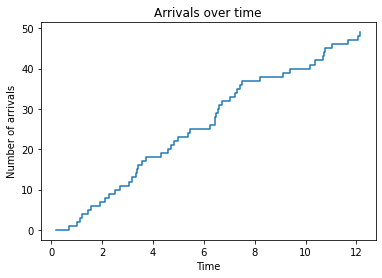

In [69]:
#  Poisson process (1)
rate = 4.0
inter_arrival_times = rng.exponential(scale=1./rate, size=50)
arrivals = np.add.accumulate(inter_arrival_times)  #  这是到达时刻
count = np.arange(50)

fig1, ax1 = plt.subplots()
ax1.step(arrivals, count, where="post")
#ax1.plot(arrivals, count,'b--')
ax1.set_xlabel("Time")
ax1.set_ylabel("Number of arrivals")
ax1.set_title("Arrivals over time")

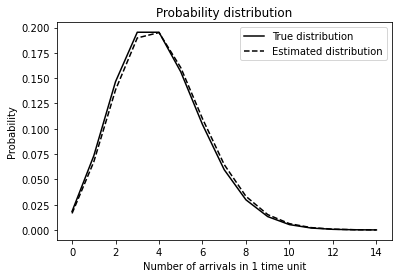

In [71]:
#  Poisson process (2)  概率分布
from scipy.special import factorial
N = np.arange(15)
def probability(events, time=1, param=rate):
    return ((param*time)**events/factorial(events))*np.exp(-param*time)

fig2, ax2 = plt.subplots()
ax2.plot(N, probability(N), "k", label="True distribution")
ax2.set_xlabel("Number of arrivals in 1 time unit")
ax2.set_ylabel("Probability")
ax2.set_title("Probability distribution")
estimated_scale = np.mean(inter_arrival_times)
estimated_rate = 1.0/estimated_scale
ax2.plot(N, probability(N, param=estimated_rate), "k--",label="Estimated distribution")
ax2.legend()

In [ ]:
#  贝叶斯
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import beta as beta_dist
beta_pdf = beta_dist.pdf  #  probability density function
#  prior
prior_alpha = 25
prior_beta = 75
args = (prior_alpha, prior_beta)
prior_over_33, err = sp.integrate.quad(beta_pdf, 0.33, 1,args=args)
print("Prior probability", prior_over_33)  #  Prior probability 0.03783078703016522
#  For example, we observed 122 successes and 257 failures over this period.
observed_successes = 122
observed_failures = 257
#  posterior
posterior_alpha = prior_alpha + observed_successes
posterior_beta = prior_beta + observed_failures
args = (posterior_alpha, posterior_beta)
posterior_over_33, err2 = sp.integrate.quad(beta_pdf, 0.33, 1,args=args)
print("Posterior probability", posterior_over_33)  #  Posterior probability 0.13686193416280265
#  画图比较prior和posterior
p = np.linspace(0, 1, 500)
prior_dist = beta_pdf(p, prior_alpha, prior_beta)
posterior_dist = beta_pdf(p, posterior_alpha, posterior_beta)

fig, ax = plt.subplots()
ax.plot(p, prior_dist, "k--", label="Prior")
ax.plot(p, posterior_dist, "k", label="Posterior")
ax.legend()
ax.set_xlabel("Success rate")
ax.set_ylabel("Density")
ax.set_title("Prior and posterior distributions for success rate")


In [ ]:
#  Markov Chain Monte Carlo (MCMC)  ap math 145页
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng(12345)
def underlying(x, params):
    return params[0]*x**2 + params[1]*x + params[2]
size = 100
true_params = [2, -7, 6]  #   多项式的coeff
x_vals = np.linspace(-5, 5, size)
raw_model = underlying(x_vals, true_params)
noise = rng.normal(loc=0.0, scale=10.0, size=size)
sample = raw_model + noise
#  scatter plotting method to plot only the data points
fig1, ax1 = plt.subplots()
ax1.scatter(x_vals, sample, label="Sampled data")
ax1.plot(x_vals, raw_model, "k--", label="Underlying model")
ax1.set_title("Sampled data")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
#  PyMC3 is a Python package for Bayesian statistical modeling and Probabilistic Machine Learning


